# LinkedIn Companies Data Analysis

This notebook loads and displays the scraped company data from `companies-optimized.json`

In [10]:
import pandas as pd
import json
import plotly as plt

ModuleNotFoundError: No module named 'plotly'

In [2]:
# Load the JSON data
with open('scraped-data/companies-optimized.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

print(f"Total companies: {len(df)}")
df.head()

Total companies: 963


,companyId,name,universalName,tagline,description,website,phone,email,industry,companySize,...,companyType,founded,headquarters,locations,linkedinUrl,followerCount,specialties,logoUrl,coverImageUrl,scrapedAt
0,tech-grid-asia,Tech Grid Asia,tech-grid-asia,Partnering you with Technologies,,http://www.techgrid.co/,,,IT Services and IT Consulting,11-50,...,,2013,,[],https://www.linkedin.com/company/tech-grid-asia/,0,"[Software Solution, Bespoke Technology, Tech R...",,,2025-10-02T06:51:11.675Z
1,tech-curve-ai-innovations,Tech Curve AI & Innovations,tech-curve-ai-innovations,Empowered By Innovations!!!,,http://techcurve.co/,+6622586228,information@techcurve.co,Software Development,11-50,...,,2018,"Khlong Toei Nuea, Bangkok City",[],https://www.linkedin.com/company/tech-curve-ai...,0,"[Seeq, Canary, data historian, Magic Wand, Gen...",,,2025-10-02T06:51:12.347Z
2,ai-and-robotics-ventures,AI and Robotics Ventures,ai-and-robotics-ventures,AI and Robotics Partner of Choice,,http://www.arv.co.th/,+6620784000,10400CONTACT@ARV.CO.THSUBSCRIBESign,Industrial Automation,201-500,...,,2018,"Phaya Thai, Bangkok",[],https://www.linkedin.com/company/ai-and-roboti...,0,[],,,2025-10-02T06:51:36.355Z
3,tech-titan,Tech Titan Group,tech-titan,Leading Distributor of Cybersecurity Solution ...,,http://www.tech-titan.com/,+603 2298 0399,,Computer and Network Security,201-500,...,,2008,"KL Eco City, Kuala Lumpur",[],https://www.linkedin.com/company/tech-titan/,0,"[IT Distribution, Cybersecurity Solution, Prof...",,,2025-10-02T06:51:36.702Z
4,ai-gen,AI GEN,ai-gen,Think AI Think AI GEN,,https://aigencorp.com/,+66 2 8216686,contact@aigencorp.com,IT Services and IT Consulting,11-50,...,,2019,"Bangkok, Bangkok City",[],https://www.linkedin.com/company/ai-gen/,0,[],,,2025-10-02T06:51:59.757Z


In [3]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   companyId      963 non-null    object 
 1   name           963 non-null    object 
 2   universalName  963 non-null    object 
 3   tagline        963 non-null    object 
 4   description    963 non-null    object 
 5   website        963 non-null    object 
 6   phone          963 non-null    object 
 7   email          963 non-null    object 
 8   industry       963 non-null    object 
 9   companySize    963 non-null    object 
 10  employeeCount  959 non-null    float64
 11  companyType    963 non-null    object 
 12  founded        963 non-null    object 
 13  headquarters   963 non-null    object 
 14  locations      963 non-null    object 
 15  linkedinUrl    963 non-null    object 
 16  followerCount  963 non-null    int64  
 17  specialties    963 non-null    object 
 18  logoUrl   

In [4]:
# Display basic statistics
df.describe()

,employeeCount,followerCount
count,959.000000,963.0
mean,151.216893,0.0
std,222.992264,0.0
min,6.000000,0.0
25%,30.000000,0.0
50%,125.000000,0.0
75%,125.000000,0.0
max,3000.000000,0.0


In [19]:
# Count non-null phone and email
phone_count = df['phone'].apply(lambda x: x.strip() != '').sum()
email_count = df['email'].apply(lambda x: x.strip() != '').sum()
web_count = df['website'].apply(lambda x: x.strip() != '').sum()

print(f"Companies with phone number: {phone_count}")
print(f"Companies with email: {email_count}")
print(f"Companies with website: {web_count}")
print(f"\nTotal companies: {len(df)}")

# Export to Excel files
output_dir = 'output'

# 1. All companies
all_file = f'{output_dir}/all_companies.xlsx'
df.to_excel(all_file, index=False, engine='openpyxl')
print(f"\n✓ Exported all companies to: {all_file}")

# 2. Companies with email OR phone
with_contact = df[(df['email'].str.strip() != '') | (df['phone'].str.strip() != '')]
contact_file = f'{output_dir}/companies_with_contact.xlsx'
with_contact.to_excel(contact_file, index=False, engine='openpyxl')
print(f"✓ Exported companies with email or phone to: {contact_file}")
print(f"  Total: {len(with_contact)} companies")

# 3. Companies with phone number
with_phone = df[df['phone'].str.strip() != '']
phone_file = f'{output_dir}/companies_with_phone.xlsx'
with_phone.to_excel(phone_file, index=False, engine='openpyxl')
print(f"✓ Exported companies with phone number to: {phone_file}")
print(f"  Total: {len(with_phone)} companies")

# 4. Summary stats
summary_data = {
    'Metric': ['Total Companies', 'With Phone', 'With Email', 'With Email OR Phone', 'With Phone Only'],
    'Count': [len(df), phone_count, email_count, len(with_contact), len(with_phone)]
}
summary_df = pd.DataFrame(summary_data)
summary_file = f'{output_dir}/summary_stats.xlsx'
summary_df.to_excel(summary_file, index=False, engine='openpyxl')
print(f"✓ Exported summary statistics to: {summary_file}")

Companies with phone number: 407
Companies with email: 362
Companies with website: 963

Total companies: 963

✓ Exported all companies to: output/all_companies.xlsx
✓ Exported companies with email or phone to: output/companies_with_contact.xlsx
  Total: 597 companies
✓ Exported companies with phone number to: output/companies_with_phone.xlsx
  Total: 407 companies
✓ Exported summary statistics to: output/summary_stats.xlsx


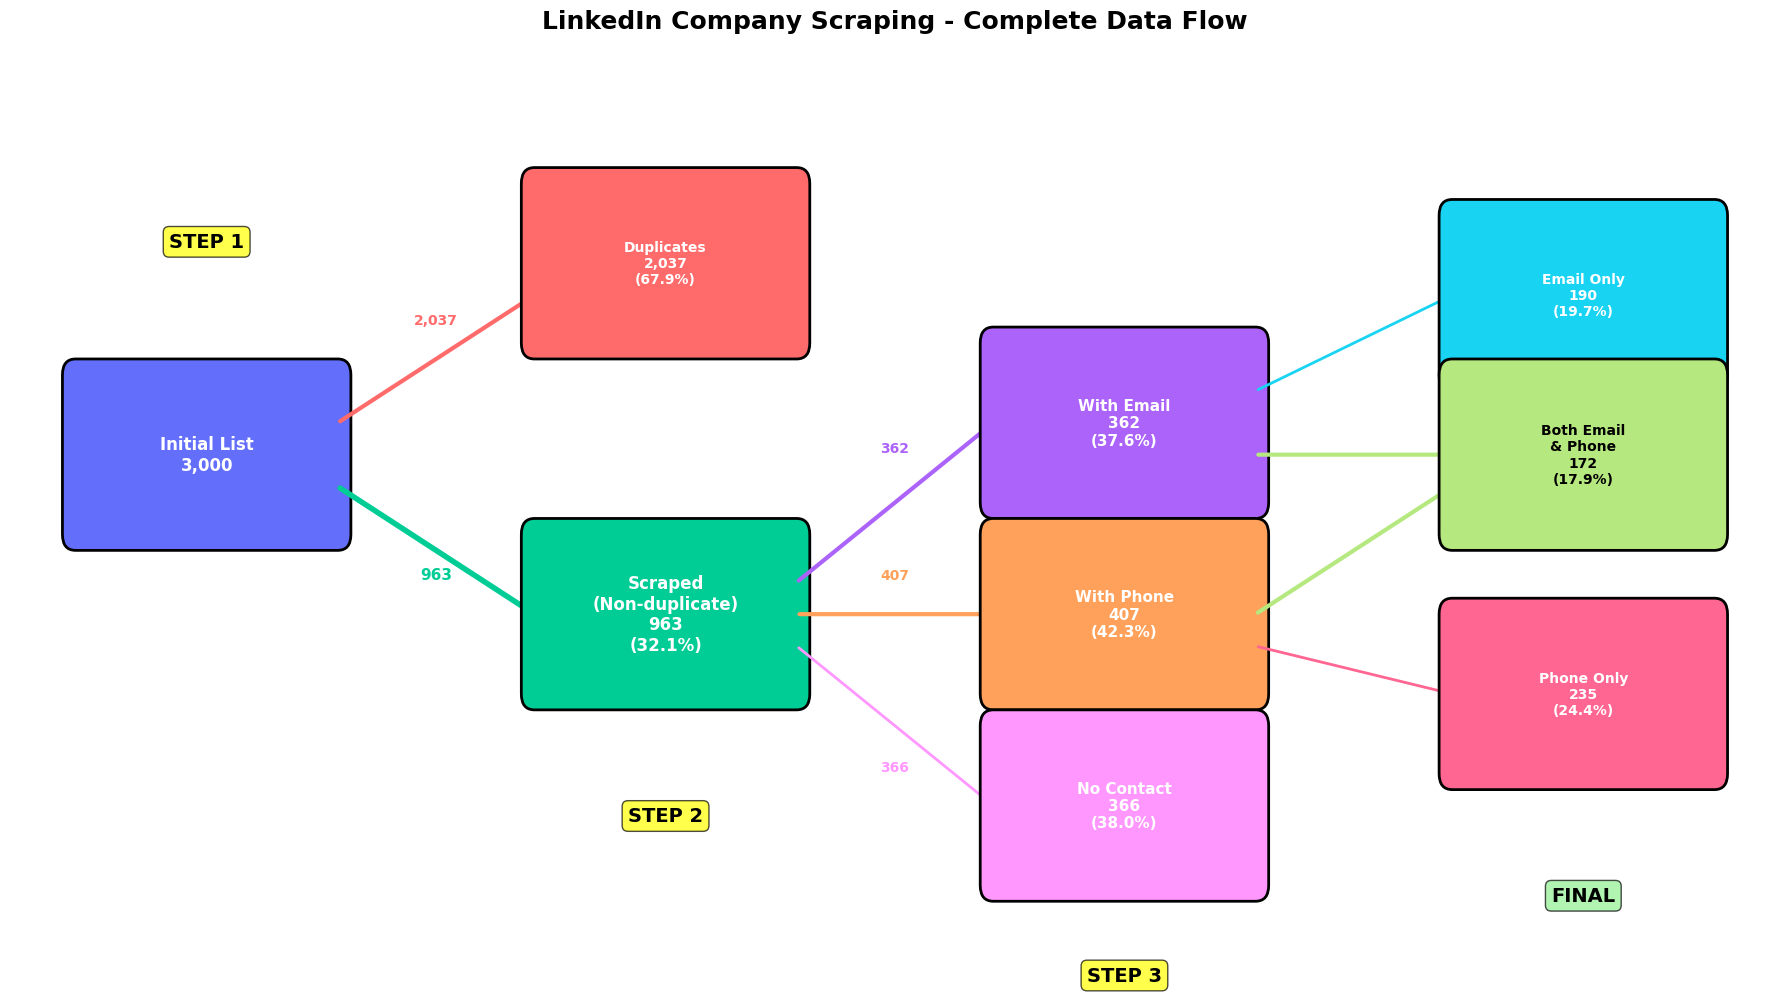


SUMMARY STATISTICS
STEP 1 - Initial List:       3,000
         Duplicates removed:  2,037 (67.9%)

STEP 2 - Scraped:             963 (32.1%)

STEP 3 - Contact Breakdown:
         With email:          362 (37.6%)
         With phone:          407 (42.3%)
         No contact:          366 (38.0%)

FINAL - Detailed Breakdown:
         Email only:          190 (19.7%)
         Phone only:          235 (24.4%)
         Both:                172 (17.9%)
         With email OR phone: 597 (62.0%)


In [18]:
# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Calculate counts
total_initial = 3000
total_scraped = len(df)
duplicates = total_initial - total_scraped
with_email = df[df['email'].str.strip() != ''].shape[0]
with_phone = df[df['phone'].str.strip() != ''].shape[0]
with_both = df[(df['email'].str.strip() != '') & (df['phone'].str.strip() != '')].shape[0]
with_email_only = with_email - with_both
with_phone_only = with_phone - with_both
with_neither = total_scraped - with_email - with_phone + with_both
with_contact = with_email + with_phone - with_both

# Create figure
fig, ax = plt.subplots(figsize=(18, 10))

# Define positions and sizes
box_width = 2
box_height = 1
y_start = 5

# Step 1: Initial List
ax.add_patch(FancyBboxPatch((0, y_start), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#636EFA', edgecolor='black', linewidth=2))
ax.text(1, y_start+0.5, f'Initial List\n3,000', ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Arrow to duplicates
ax.add_patch(FancyArrowPatch((2, y_start+0.7), (3.5, y_start+1.5),
                            arrowstyle='->', lw=3, color='#FF6B6B'))
ax.text(2.75, y_start+1.3, f'{duplicates:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#FF6B6B')

# Duplicates box
ax.add_patch(FancyBboxPatch((3.5, y_start+1.2), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#FF6B6B', edgecolor='black', linewidth=2))
ax.text(4.5, y_start+1.7, f'Duplicates\n{duplicates:,}\n({duplicates/total_initial*100:.1f}%)', 
        ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Arrow to scraped
ax.add_patch(FancyArrowPatch((2, y_start+0.3), (3.5, y_start-0.5),
                            arrowstyle='->', lw=4, color='#00CC96'))
ax.text(2.75, y_start-0.3, f'{total_scraped:,}', ha='center', va='bottom', fontsize=11, fontweight='bold', color='#00CC96')

# Step 2: Scraped (Non-duplicate)
ax.add_patch(FancyBboxPatch((3.5, y_start-1), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#00CC96', edgecolor='black', linewidth=2))
ax.text(4.5, y_start-0.5, f'Scraped\n(Non-duplicate)\n{total_scraped:,}\n({total_scraped/total_initial*100:.1f}%)', 
        ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Arrows to contact types
# With Email
ax.add_patch(FancyArrowPatch((5.5, y_start-0.3), (7, y_start+0.7),
                            arrowstyle='->', lw=3, color='#AB63FA'))
ax.text(6.25, y_start+0.5, f'{with_email:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#AB63FA')

# With Phone
ax.add_patch(FancyArrowPatch((5.5, y_start-0.5), (7, y_start-0.5),
                            arrowstyle='->', lw=3, color='#FFA15A'))
ax.text(6.25, y_start-0.3, f'{with_phone:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#FFA15A')

# No Contact
ax.add_patch(FancyArrowPatch((5.5, y_start-0.7), (7, y_start-1.7),
                            arrowstyle='->', lw=2, color='#FF97FF'))
ax.text(6.25, y_start-1.5, f'{with_neither:,}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#FF97FF')

# Step 3: Contact breakdown boxes
# Email box
ax.add_patch(FancyBboxPatch((7, y_start+0.2), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#AB63FA', edgecolor='black', linewidth=2))
ax.text(8, y_start+0.7, f'With Email\n{with_email:,}\n({with_email/total_scraped*100:.1f}%)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# Phone box
ax.add_patch(FancyBboxPatch((7, y_start-1), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#FFA15A', edgecolor='black', linewidth=2))
ax.text(8, y_start-0.5, f'With Phone\n{with_phone:,}\n({with_phone/total_scraped*100:.1f}%)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# No contact box
ax.add_patch(FancyBboxPatch((7, y_start-2.2), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#FF97FF', edgecolor='black', linewidth=2))
ax.text(8, y_start-1.7, f'No Contact\n{with_neither:,}\n({with_neither/total_scraped*100:.1f}%)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# Final breakdown arrows and boxes
# Email Only
ax.add_patch(FancyArrowPatch((9, y_start+0.9), (10.5, y_start+1.5),
                            arrowstyle='->', lw=2, color='#19D3F3'))
ax.add_patch(FancyBboxPatch((10.5, y_start+1), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#19D3F3', edgecolor='black', linewidth=2))
ax.text(11.5, y_start+1.5, f'Email Only\n{with_email_only:,}\n({with_email_only/total_scraped*100:.1f}%)', 
        ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Both
ax.add_patch(FancyArrowPatch((9, y_start+0.5), (10.5, y_start+0.5),
                            arrowstyle='->', lw=3, color='#B6E880'))
ax.add_patch(FancyArrowPatch((9, y_start-0.5), (10.5, y_start+0.3),
                            arrowstyle='->', lw=3, color='#B6E880'))
ax.add_patch(FancyBboxPatch((10.5, y_start), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#B6E880', edgecolor='black', linewidth=2))
ax.text(11.5, y_start+0.5, f'Both Email\n& Phone\n{with_both:,}\n({with_both/total_scraped*100:.1f}%)', 
        ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Phone Only
ax.add_patch(FancyArrowPatch((9, y_start-0.7), (10.5, y_start-1),
                            arrowstyle='->', lw=2, color='#FF6692'))
ax.add_patch(FancyBboxPatch((10.5, y_start-1.5), box_width, box_height, 
                            boxstyle="round,pad=0.1", facecolor='#FF6692', edgecolor='black', linewidth=2))
ax.text(11.5, y_start-1, f'Phone Only\n{with_phone_only:,}\n({with_phone_only/total_scraped*100:.1f}%)', 
        ha='center', va='center', fontsize=10, fontweight='bold', color='white')

# Add step labels
ax.text(1, y_start+1.8, 'STEP 1', ha='center', fontsize=14, fontweight='bold', 
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
ax.text(4.5, y_start-1.8, 'STEP 2', ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
ax.text(8, y_start-2.8, 'STEP 3', ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
ax.text(11.5, y_start-2.3, 'FINAL', ha='center', fontsize=14, fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.7))

# Set axis properties
ax.set_xlim(-0.5, 13)
ax.set_ylim(2.5, 8)
ax.axis('off')

plt.title('LinkedIn Company Scraping - Complete Data Flow', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(f"STEP 1 - Initial List:       {total_initial:,}")
print(f"         Duplicates removed:  {duplicates:,} ({duplicates/total_initial*100:.1f}%)")
print(f"\nSTEP 2 - Scraped:             {total_scraped:,} ({total_scraped/total_initial*100:.1f}%)")
print(f"\nSTEP 3 - Contact Breakdown:")
print(f"         With email:          {with_email:,} ({with_email/total_scraped*100:.1f}%)")
print(f"         With phone:          {with_phone:,} ({with_phone/total_scraped*100:.1f}%)")
print(f"         No contact:          {with_neither:,} ({with_neither/total_scraped*100:.1f}%)")
print(f"\nFINAL - Detailed Breakdown:")
print(f"         Email only:          {with_email_only:,} ({with_email_only/total_scraped*100:.1f}%)")
print(f"         Phone only:          {with_phone_only:,} ({with_phone_only/total_scraped*100:.1f}%)")
print(f"         Both:                {with_both:,} ({with_both/total_scraped*100:.1f}%)")
print(f"         With email OR phone: {with_contact:,} ({with_contact/total_scraped*100:.1f}%)")
print("="*70)

In [ ]:
# Employee count distribution analysis
import matplotlib.pyplot as plt
import numpy as np

# Create employee count ranges
def categorize_employee_count(count):
    if pd.isna(count):
        return 'Unknown'
    elif count <= 10:
        return '1-10'
    elif count <= 50:
        return '11-50'
    elif count <= 100:
        return '51-100'
    elif count <= 200:
        return '101-200'
    elif count <= 500:
        return '201-500'
    elif count <= 1000:
        return '501-1000'
    else:
        return '1000+'

df['employeeRange'] = df['employeeCount'].apply(categorize_employee_count)

# Count companies in each range
range_counts = df['employeeRange'].value_counts().sort_index()

# Define order for proper display
range_order = ['1-10', '11-50', '51-100', '101-200', '201-500', '501-1000', '1000+', 'Unknown']
range_counts = range_counts.reindex([r for r in range_order if r in range_counts.index])

# Create bar chart
fig, ax = plt.subplots(figsize=(14, 7))

colors = ['#636EFA', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF']
bars = ax.bar(range(len(range_counts)), range_counts.values, color=colors[:len(range_counts)], alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, range_counts.values)):
    height = bar.get_height()
    percentage = (value / len(df)) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{int(value)}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize chart
ax.set_xlabel('Employee Count Range', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Companies', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Companies by Employee Count', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(len(range_counts)))
ax.set_xticklabels(range_counts.index, fontsize=12, fontweight='bold')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n" + "="*70)
print("EMPLOYEE COUNT DISTRIBUTION")
print("="*70)
for range_label, count in range_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{range_label:12s}: {count:4d} companies ({percentage:5.1f}%)")
print("="*70)
print(f"{'Total':12s}: {len(df):4d} companies (100.0%)")
print("="*70)